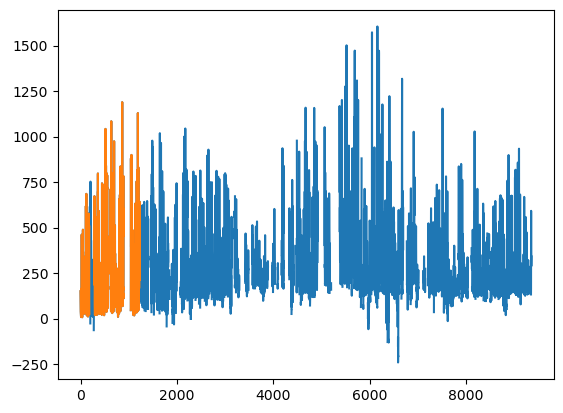

In [2]:
# use a regression model to predict all the NMHC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('data/AirQualityUCI.csv', sep=';')
df.insert(0, 'Timestamp', pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S'))
df = df.drop(['Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'], axis=1)
for col in df.columns.drop('Timestamp'):
    df[col] = df[col].map(lambda x: float(str(x).replace(',', '.')))
df = df.replace(-200, np.nan)
df = df.loc[~pd.isnull(df['Timestamp']), :]

features = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']
predict = 'NMHC(GT)'

# we train on all data where predict and features are not nan
df_nn = df.dropna()
X = df_nn[features]
y = df_nn[predict]

model = LinearRegression()
model.fit(X=X, y=y)

# we apply the model to data where features are not nan
X = df[features]
X_nn = X.dropna()
predictions = model.predict(X_nn)

# write to df
nan_inds = np.where(df[predict].isnull())[0]
predictions = pd.DataFrame(predictions, index=X_nn.index)

imputed = df.copy()

for i in nan_inds:
    if i in predictions.index:
        imputed.loc[i, predict] = predictions.loc[i,0]

plt.plot(imputed[predict])
plt.plot(df[predict])

# write to file
imputed.to_csv('output_data/NMHC(GT)_imputed.csv')
imputed.to_excel('output_data/NMHC(GT)_imputed.xlsx')